In [3]:
import pandas as pd # data pre-processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # import it for numerical computation on data 
import matplotlib.pyplot as plt ## data viz libraries 
import seaborn as sns

In [4]:
df = pd.read_csv('bitcoin_price_Training - Training.csv')

In [5]:
df.sample(5)

,Date,Open,High,Low,Close,Volume,Market Cap
49,"Jun 12, 2017",2953.22,2997.26,2518.56,2659.63,"2,569,530,000","48,391,200,000"
1060,"Sep 05, 2014",489.67,490.64,481.61,483.34,"15,302,500","6,477,530,000"
973,"Dec 01, 2014",378.25,383.66,376.67,379.25,"11,763,000","5,128,700,000"
311,"Sep 23, 2016",596.20,603.21,595.79,602.84,"51,067,000","9,469,130,000"
1332,"Dec 07, 2013",835.32,854.64,640.22,698.23,-,"10,096,600,000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [28]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")

In [29]:
df.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
date          datetime64[ns]
dtype: object

In [33]:
df["date"]

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: date, Length: 1556, dtype: datetime64[ns]

In [38]:
df.isna().sum

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
date          0
dtype: int64

In [42]:
df = df.sort_index(ascending=False).reset_index()

In [45]:
df.drop('index', axis=1, inplace=True)

In [46]:
df

,Date,Open,High,Low,Close,Volume,Market Cap,date
0,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000",2013-04-28
1,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000",2013-04-29
2,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000",2013-04-30
3,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000",2013-05-01
4,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000",2013-05-02
...,...,...,...,...,...,...,...,...
1551,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2017-07-27
1552,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2017-07-28
1553,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2017-07-29
1554,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2017-07-30


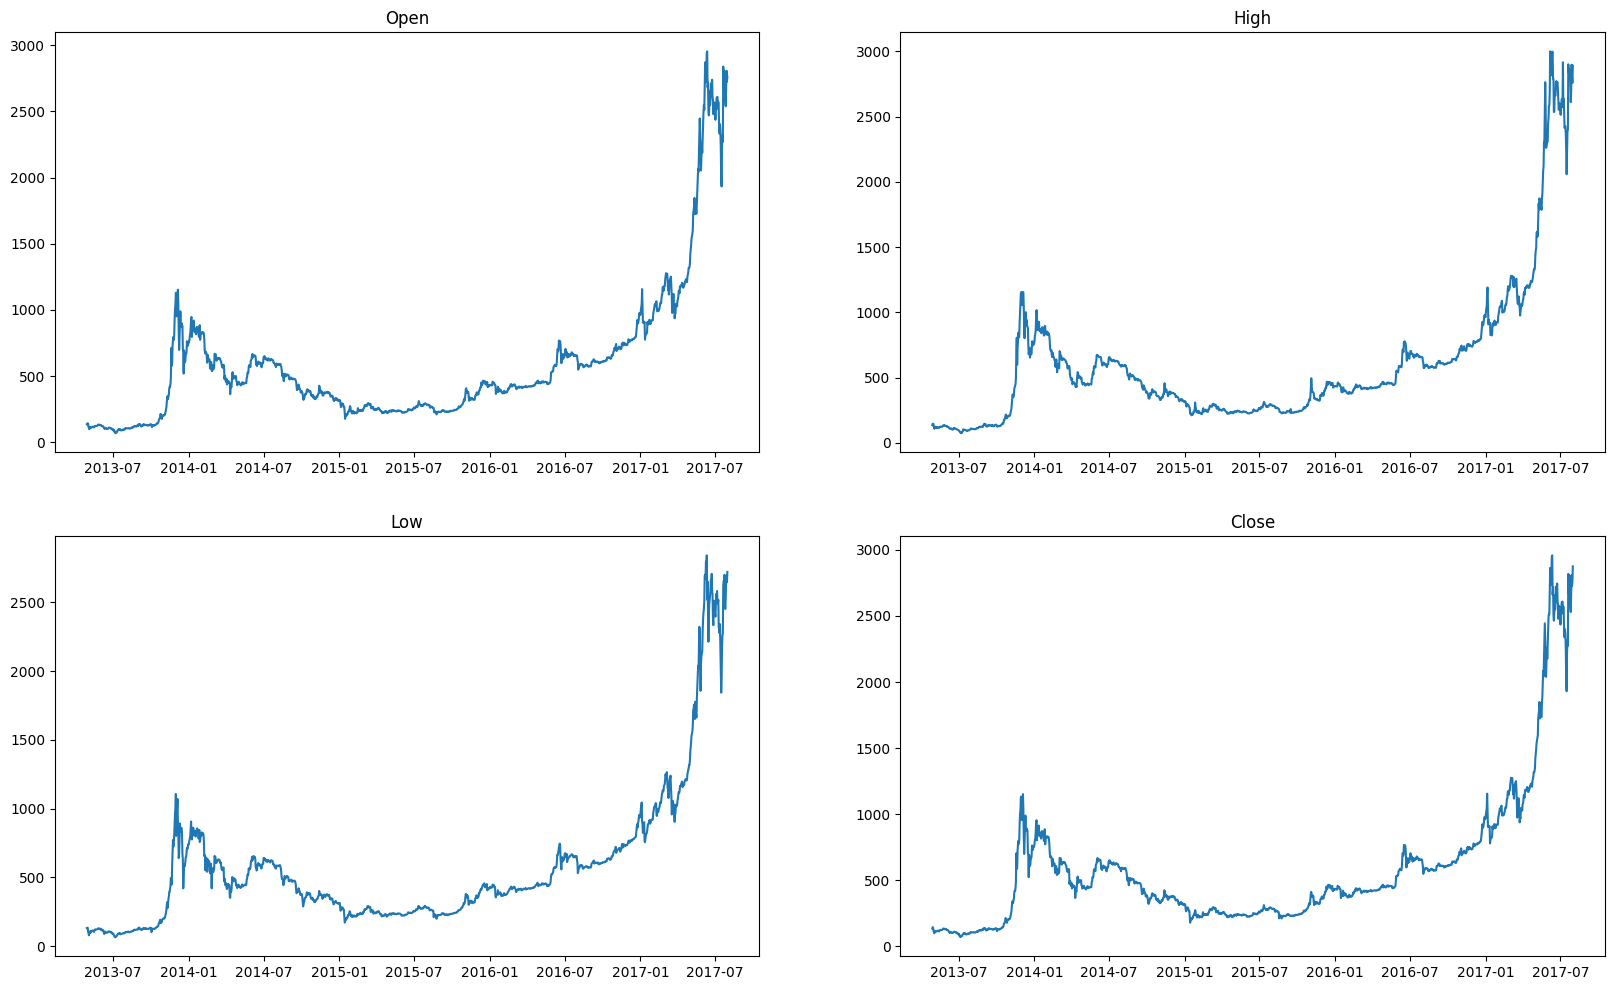

In [53]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(df['date'], df[col])
    plt.title(col)


In [55]:
bit_sample = df[0:50]

<Axes: xlabel='date'>

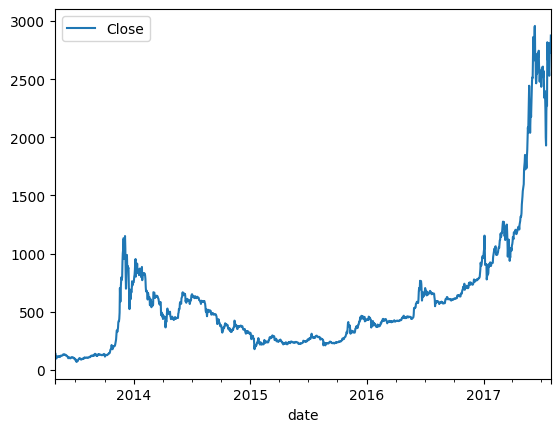

In [62]:
df.plot(x='date', y='Close')

In [65]:
df.drop('Date', axis=1, inplace=True)

In [68]:
df.set_index('date', inplace=True)

In [69]:
df

,Open,High,Low,Close,Volume,Market Cap
date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


/tmp/ipykernel_40666/3020322756.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df['Close'].resample('Q').mean().plot()


<Axes: xlabel='date'>

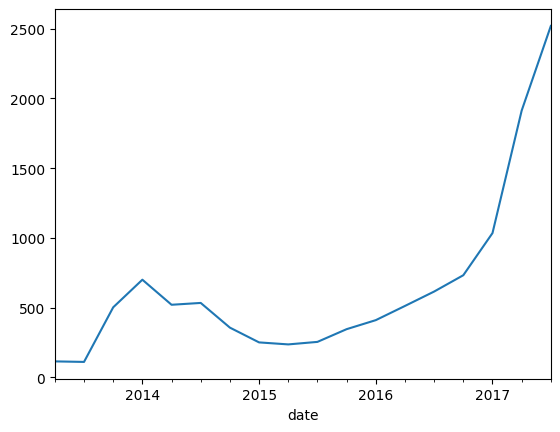

In [72]:
df['Close'].resample('Q').mean().plot()

In [73]:
df['Close'].pct_change()*100

date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close, Length: 1556, dtype: float64